# Train a CNN to classify images from cifar

### Load data

In [39]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Visualize the data

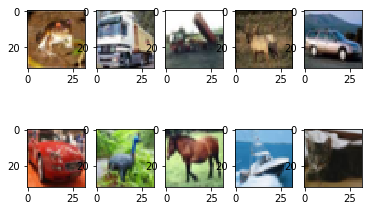

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(np.squeeze(x_train[i]))

### Rescale data

In [41]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

### Preprocess data

In [42]:
# one hot
class_num = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, class_num)
y_test = keras.utils.to_categorical(y_test, class_num)

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print('x_train.shape: ', x_train.shape)
print('number of x_train: ', x_train.shape[0])
print('number of x_valid: ', x_valid.shape[0])

x_train.shape:  (45000, 32, 32, 3)
number of x_train:  45000
number of x_valid:  5000


### Define the model

In [43]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 64)          0         
__________

### Compiler model

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the model

In [45]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 25s - loss: 1.5793 - acc: 0.4267 - val_loss: 1.2703 - val_acc: 0.5488
Epoch 2/10
 - 26s - loss: 1.2857 - acc: 0.5423 - val_loss: 1.4227 - val_acc: 0.5238
Epoch 3/10
 - 26s - loss: 1.1679 - acc: 0.5883 - val_loss: 1.0973 - val_acc: 0.6132
Epoch 4/10
 - 28s - loss: 1.0942 - acc: 0.6148 - val_loss: 1.0030 - val_acc: 0.6516
Epoch 5/10
 - 27s - loss: 1.0349 - acc: 0.6398 - val_loss: 0.9780 - val_acc: 0.6628
Epoch 6/10
 - 26s - loss: 1.0054 - acc: 0.6511 - val_loss: 1.0188 - val_acc: 0.6462
Epoch 7/10
 - 25s - loss: 0.9796 - acc: 0.6616 - val_loss: 0.9281 - val_acc: 0.6800
Epoch 8/10
 - 25s - loss: 0.9634 - acc: 0.6692 - val_loss: 0.8755 - val_acc: 0.7004
Epoch 9/10
 - 25s - loss: 0.9502 - acc: 0.6761 - val_loss: 1.0479 - val_acc: 0.6564
Epoch 10/10
 - 25s - loss: 0.9478 - acc: 0.6783 - val_loss: 0.9891 - val_acc: 0.6660


### Evaluate

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print("score is", score[1])

score is 0.6598
